In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Parameters
annualized_return = 0.08
volatility = 0.20
T = 50  # years
N = 250  # steps per year

time_steps = T * N
dt = 1 / N  # time step (in years)

In [5]:
# Initialize arrays for the binomial tree
np.random.seed(69)  # for reproducibility
u = np.exp(volatility * np.sqrt(dt))
d = 1 / u
p = (np.exp(annualized_return * dt) - d) / (u - d)

In [6]:
# Simulate one random path
S0 = 100  # initial stock price
S = [S0]
for _ in range(time_steps):
    if np.random.rand() < p:
        S.append(S[-1] * u)
    else:
        S.append(S[-1] * d)

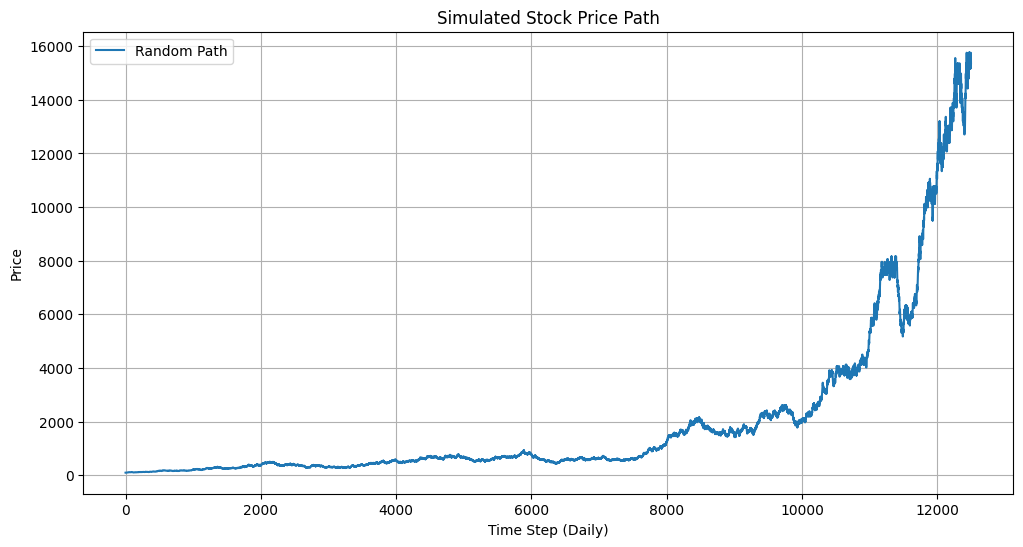

In [7]:
# (a) Plot the daily prices
plt.figure(figsize=(12, 6))
plt.plot(S, label="Random Path")
plt.title("Simulated Stock Price Path")
plt.xlabel("Time Step (Daily)")
plt.ylabel("Price")
plt.legend()
plt.grid()
plt.show()

In [8]:
# (b) Arithmetic average of yearly returns
yearly_returns = [(S[i * N] / S[(i - 1) * N]) - 1 for i in range(1, T + 1)]
arithmetic_avg = np.mean(yearly_returns)

In [9]:
# (c) Geometric average of yearly returns
total_return = S[-1] / S0
geometric_avg = total_return ** (1 / T) - 1

In [10]:
print(f"Arithmetic Average of Yearly Returns: {arithmetic_avg * 100:.2f}%")
print(f"Geometric Average of Yearly Returns: {geometric_avg * 100:.2f}%")

Arithmetic Average of Yearly Returns: 12.57%
Geometric Average of Yearly Returns: 10.59%
